# Linear Programming using Gurobi Optimization & Python's inbuilt Scipy 

**Linear programming is a simple technique where we depict complex relationships through linear functions and then find the optimum points. The important word in the previous sentence is depicted. The real relationships might be much more complex – but we can simplify them to linear relationships.**

### Lets solve following problem:

**Note-** linprog() solves only minimization (not maximization) problems and doesn’t allow inequality constraints with the greater than or equal to sign (≥). To work around these issues, you need to modify your problem before starting optimization:

Instead of maximizing z = x + 2y, you can minimize its negative(−z = −x − 2y).
Instead of having the greater than or equal to sign, you can multiply the yellow inequality by −1 and get the opposite less than or equal to sign (≤).

After introducing these changes, you get a new system:

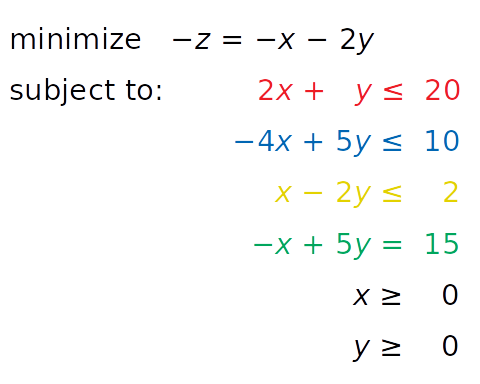

# 1. Using Python's inbuilt scipy library

In [1]:
from scipy.optimize import linprog # import linproog from scipy

In [31]:
obj = [-1, -2]          # Coefficient for x & Coefficient for y in objective function


lhs_ineq = [[ 2,  1],  # Red constraint left side
             [-4,  5],  # Blue constraint left side
            [ 1, -2]]  # Yellow constraint left side

rhs_ineq = [20,  # Red constraint right side
            10,  # Blue constraint right side
             2]  # Yellow constraint right side

lhs_eq = [[-1, 5]]  # Green constraint left side
rhs_eq = [15]       # Green constraint right side

In [32]:
bnd = [(0, float("inf")),  # Bounds of x
       (0, float("inf"))]  # Bounds of y

In [33]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
             A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
            method="revised simplex")

In [34]:
opt

     con: array([0.])
     fun: -16.818181818181817
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 0.        , 18.18181818,  3.36363636])
  status: 0
 success: True
       x: array([7.72727273, 4.54545455])

In [35]:
opt.x # coeff for x & y

array([7.72727273, 4.54545455])

In [36]:
opt.fun # Optimized value of objective function (Z)

-16.818181818181817

# 2. Using Gurobi Optimization

In [9]:
!pip install gurobipy # Install gurobipy using pip

     ---------------------------------------- 9.7/9.7 MB 3.5 MB/s eta 0:00:00


In [10]:
import gurobipy as gp

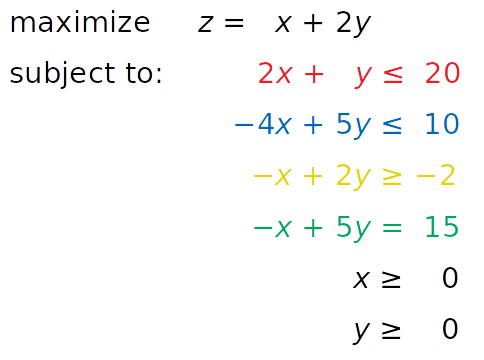

In [40]:
# Create a new model
m = gp.Model()

# Create variables
x = m.addVar(vtype='C', name="x")
y = m.addVar(vtype='C', name="y")

# Set objective function
m.setObjective(x + 2*y, gp.GRB.MAXIMIZE)

# Add constraints
m.addConstr(2*x + y <= 20)
m.addConstr(-4*x + 5*y <= 10)
m.addConstr(-x + 2*y >= -2)
m.addConstr(-x + 5*y == 15)
m.addConstr(x>= 0)
m.addConstr(y>= 0)

# Solve it!
m.optimize()


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i3-3240 CPU @ 3.40GHz, instruction set [SSE2|AVX]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 6 rows, 2 columns and 10 nonzeros
Model fingerprint: 0x28e73b81
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+01]
Presolve removed 6 rows and 2 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.6818182e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.681818182e+01


In [41]:
m.printAttr('x')


    Variable            x 
-------------------------
           x      7.72727 
           y      4.54545 


**Note-** Both Scipy & Gurobi models provide the same values of x & y

SciPy’s linear programming capabilities are useful mainly for smaller problems. For larger and more complex problems, you might find other libraries more suitable for the following reasons:

SciPy can’t run various external solvers.

SciPy can’t work with integer decision variables.

SciPy doesn’t provide classes or functions that facilitate model building. You have to define arrays and matrices, which might be a tedious and error-prone task for large problems.

SciPy doesn’t allow you to define maximization problems directly. You must convert them to minimization problems.

SciPy doesn’t allow you to define constraints using the greater-than-or-equal-to sign directly. You must use the less-than-or-equal-to instead.